# Exercise - Landau Section 4.1.2: Computing a random sequence:

For scientific work we recommend using an industrial-strength random-number generator.
To see why, here we assess how bad a careless application of the power residue method
canbe.

1) Write a simple program to generate random numbers using the linear congruent
method (4.2).
2) For pedagogical purposes, try the unwise choice: (a,c,M,r1) = (57,1,256,10). Determine the *period*, that is, how many numbers are generated before the sequence repeats.
3) Take your pedagogical sequence of random numbers and look for correlations by observing clustering on a plot of successive pairs $(x_i,y_i) = (r_{2i}−1,r_{2i}),i= 1,2,…$. (Do not connect the points with lines.) You may “see” correlations (Figure4.1), which means that you should not use this sequence for serious work.
4) Make your own version of Figure4.2; that is, plot $r_i$ versus $i$.
5) Test the built-in random-number generator on your computer for correlations by plotting the same pairs as above.(This should be good for serious work.)

- Hint (part 1): How can you verify your algorithm is working correctly? The text
discusses an example with M=9 and other values. Can you reproduce that
result?
- Hint (parts 3 & 5): To verify everything’s correct, compare your figures in the text

So, for number 1 we need to write a function that does eq (4.2)

$$
r_{i+1} = (a r_i + c) \space mod \space M = remainder\left(\frac{a r_i + c}{M}\right) \tag{4.2}
$$

In [62]:
def simpleRandom(a,c,M,r1):
    '''
    This is a function that replicates eq 4.2
    It takes as input a constant a, a seed r1, another constant c and the max value for iteration M
    When given c= 1,a= 4,M = 9,and r1 = 3
    it should give [3, 4, 8, 6, 7, 2, 0, 1, 5, 3].
    '''

    r = [r1]
    for i in range(M):
        rnext = (a*r[i]+c)%M
        r.append(rnext)
           
    return r

Let's check what it plots by following Hint1 and reproducing the book's example

In [63]:
simpleRandom(4,1,9,3)

[3, 4, 8, 6, 7, 2, 0, 1, 5, 3]

For 2 lets try (a,c,M,r1) = (57,1,256,10). and find its period

In [66]:
example = simpleRandom(57,1,256,10)             #Try the given values
print(example)
[i for i,val in enumerate(example) if val==10]  #this will iterate on the array finding the index where the value is val

[10, 59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 46, 63, 8, 201, 194, 51, 92, 1

[0, 256]

It seems that the period is 256, as it found the inicial value 256 places later

let's create pairs $(x_i,y_i) = (r_{2i}−1,r_{2i}),i= 1,2,…$

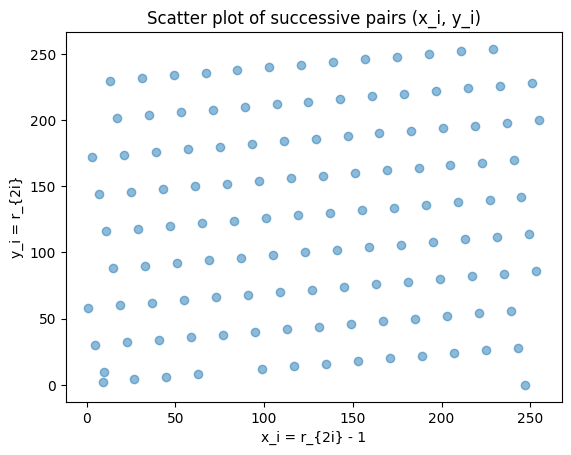

In [76]:
import matplotlib.pyplot as plt

# Generate the pairs (x_i, y_i)
pairs = [(example[(2*i)-1], example[2*i]) for i in range(256//2)]

# Separate the x and y values
x_vals = [pair[0] for pair in pairs]
y_vals = [pair[1] for pair in pairs]

# Plot the pairs
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.title('Scatter plot of successive pairs (x_i, y_i)')
plt.xlabel('x_i = r_{2i} - 1')
plt.ylabel('y_i = r_{2i}')
plt.show()

I first tried the pairs as

``` python
pairs = [(example[2*i] - 1, example[2*i]) for i in range(256//2)]
```

with the first values wrong as it gave a line. The 2i-1 is the index!

To make figure 4.2 we just plot our random array vs the sequence 0 to 256, I think.

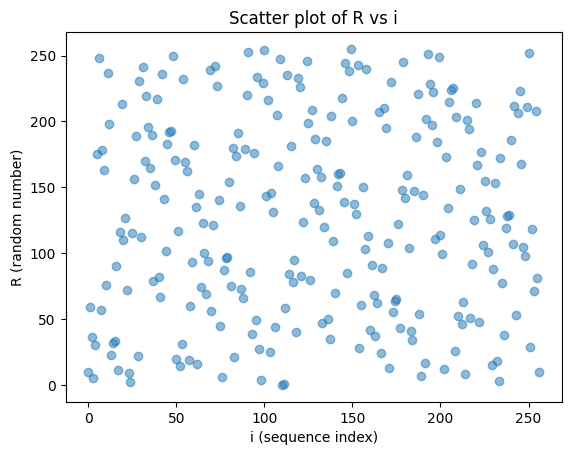

In [81]:
# Sequence index
indices = list(range(257))

# Plot R vs i
plt.scatter(indices, example, alpha=0.5)
plt.title('Scatter plot of R vs i')
plt.xlabel('i (sequence index)')
plt.ylabel('R (random number)')
plt.show()

Well, now i notice that the plot is actually normaized so lets do, that to see if that look more alike

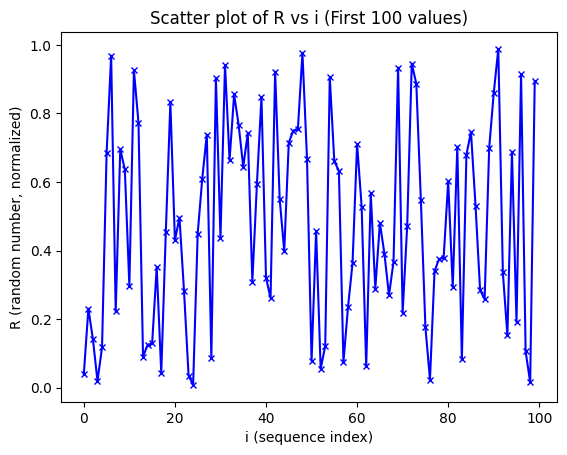

In [93]:
# Take only the first 100 values
indices = list(range(100))
normalized_R = [r / 256 for r in example[:100]]  # Normalize R to [0,1]

# Plot R vs i
plt.plot(indices, normalized_R, marker='x', linestyle='-', color='b', markersize=5)
plt.title('Scatter plot of R vs i (First 100 values)')
plt.xlabel('i (sequence index)')
plt.ylabel('R (random number, normalized)')
plt.show()

That looks similar to the book, I had to add  marker='x', linestyle='-'
on 

```python
plt.plot(indices, normalized_R, marker='x', linestyle='-', color='b', markersize=5)
```

So it looks more like the book

For the final part we use the same code as before but replace example in:

``` python
pairs = [(example[(2*i)-1], example[2*i]) for i in range(256//2)]
```

with the built in random gen


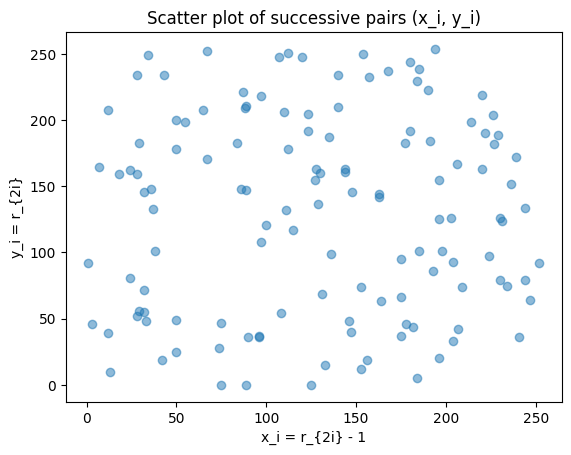

In [97]:
import random

#Generate and fill the array of random numbers
random_numbers = [random.randint(0, 255) for _ in range(256)]

# Generate the pairs (x_i, y_i)
pairs = [(random_numbers[(2*i)-1], random_numbers[2*i]) for i in range(256//2)]

# Separate the x and y values
x_vals = [pair[0] for pair in pairs]
y_vals = [pair[1] for pair in pairs]

# Plot the pairs
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.title('Scatter plot of successive pairs (x_i, y_i)')
plt.xlabel('x_i = r_{2i} - 1')
plt.ylabel('y_i = r_{2i}')
plt.show()

## 4.2.1 Random Walk Implementation

The program `walk.py` in Listing 4.1 is a sample random-walk simulation. Its key element is  
the random values for the x and y components of each step,

```python
x += (random.random() - 0.5) * 2.   # -1 =< x =< 1
y += (random.random() - 0.5) * 2.   # -1 =< y =< 1
```


where here we have omitted the scaling factor that normalizes each step to length 1.  
When using your computer to simulate a random walk, you should expect to obtain (4.14)  
only as the average displacement, averaged over many trials, not necessarily as the answer  
for each trial. Your final answer will depend on just how you take your random steps (Figure 4.4 right).

Start at the origin and take a 2D random walk with your computer:

1) To increase the amount of randomness, independently choose random values for Δx′  
   and Δy′ in the range [−1,1]. Then normalize them so that each step is of unit length


$$Δx = (1/L) * Δx', Δy = (1/L) * Δy', L = \sqrt{(Δx'^2 + Δy'^2)} \tag{4.16}$$


2) Use a plotting program to draw maps of several independent 2D random walks, each of  
1000 steps. Based on your simulations, comment on whether the results look like what  
you would expect a random walk to look like.

3) If you have your walker taking N steps in a single trial, then conduct a total number  
$K \simeq sqrt(N)$ of trials. Each trial should have N steps and start with a different seed.


4) Calculate the mean square distance \( R^2 \) for each trial and then take the average  
of \( R^2 \) for all your \( K \) trials:

$$
\langle R^2(N) \rangle = \frac{1}{K} \sum_{k=1}^{K} R^2_{(k)}(N). \tag{4.17}
$$

5) Check the validity of the assumptions made in deriving the theoretical result (4.14)  
by checking how well

$$
\frac{\langle \Delta x_i \Delta x_{j \neq i} \rangle}{R^2} \simeq \frac{\langle \Delta x_i \Delta y_j \rangle}{R^2} \simeq 0. \tag{4.18}
$$

Do your checking for both a single (long) run and for the average over trials.

6) Plot the RMS distance, $R_{\text{rms}} = \sqrt{\langle R^2(N) \rangle}$ as a function of $\sqrt{N}$.  
Values of $N$ should start with a small number, where $R \simeq \sqrt{N}$ is not expected to be accurate,  
and end at a quite large value, where two or three places of accuracy should be expected on the average.

7) ☉ Repeat the preceding and following analysis for a 3D walk as well.

                  

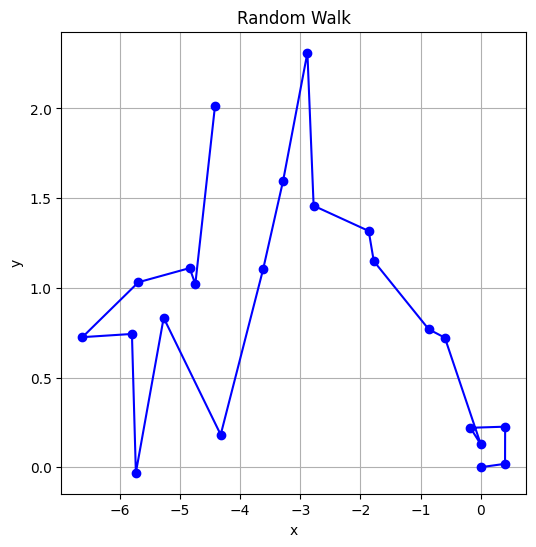

In [4]:
#from walk.py file

import random
import matplotlib.pyplot as plt

random.seed(None)  # None => system clock
jmax = 20
x, y = 0.0, 0.0  # Start at origin

# Lists to store walk coordinates
x_vals = [x]
y_vals = [y]

for _ in range(jmax + 1):         #for _ since we are not using i (index) inside the loop
    x += (random.random() - 0.5) * 2  # -1 <= x <= 1
    y += (random.random() - 0.5) * 2  # -1 <= y <= 1
    x_vals.append(x)
    y_vals.append(y)

# Plot the random walk
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.title("Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Everytime you run it, it plots a different walk, which make sense since is random, let's try add more randomness
to it as 1 asks

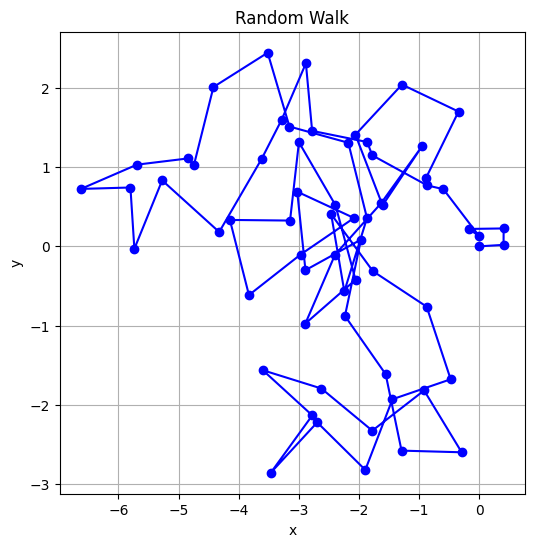

In [7]:
import math

for _ in range(jmax + 1):
    dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
    dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
    L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
    dx = (1 / L) * dx_prime
    dy = (1 / L) * dy_prime
    x += dx
    y += dy
    x_vals.append(x)
    y_vals.append(y)

# Plot the random walk
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.title("Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

here we used a random dx_prime with 

`random.random()`

that generates a random float in the range [0,1).

Subtracting 0.5 shifts the range to [−0.5,0.5).

Multiplying by 2 scales this range to [-1,1).

Then we normalize, find dx and dy, and everything follows as the `walk.py` program.

For 2) we do:

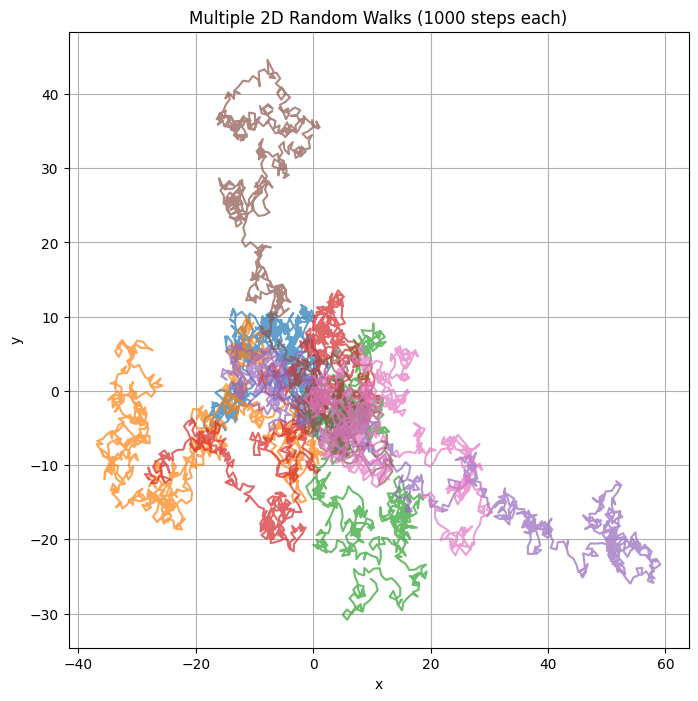

In [9]:
import random
import math
import matplotlib.pyplot as plt

random.seed(None)  # None => system clock
num_walks = 7  # Number of independent random walks
num_steps = 1000  # Number of steps per walk, we are required 1000, before it was jmax = 20

plt.figure(figsize=(8, 8)) #bigger plot to see


# nested for so we do the above code multiple times
for _ in range(num_walks):
    # each walk is independent so we initialize everything each time
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
        dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk

plt.title("Multiple 2D Random Walks (1000 steps each)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


It looks random enough to me! They all start at the origin,
then they all go different directions on same number of steps.

Number 3 is saying that we need to do $K \simeq sqrt(N)$ of trial with a different seed. I think my plot
above has them all with the same seed tho. Anyway so for $N = 1000$, $k$ is

In [11]:
k = math.sqrt(num_steps) 
k

31.622776601683793

so let's say $k=31$, let's implement it again

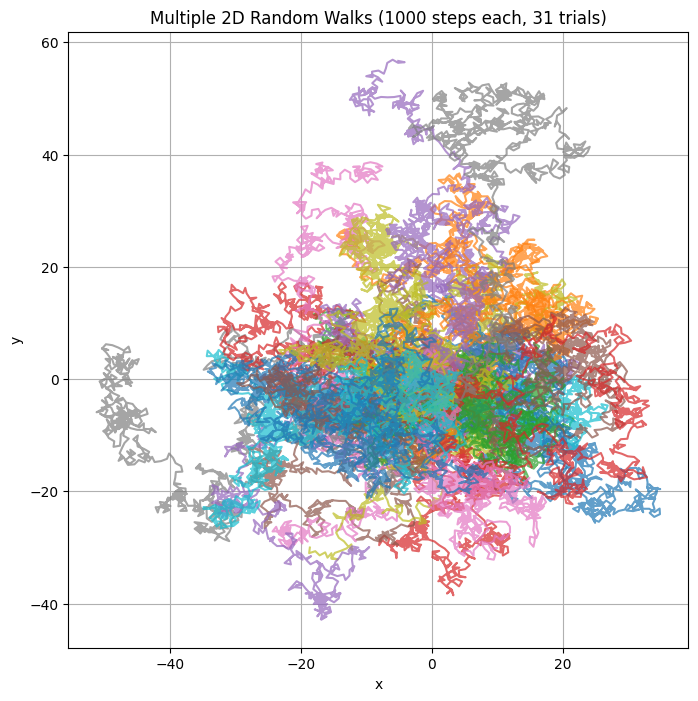

In [12]:
import random
import math
import matplotlib.pyplot as plt

#move the seed inside the loop
num_steps = 1000  # Number of steps per walk
num_walks = int(math.sqrt(num_steps))  # Number of independent random walks, using the formula above

plt.figure(figsize=(8, 8))

for i in range(num_walks):
    random.seed(i)  #Each walk has a different "random" seed
    #same from above
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() * 2) - 1  # -1 <= dx' <= 1
        dy_prime = (random.random() * 2) - 1  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Now we are asked to calculate mean square distance for each k on top of that, so i'm going to keep copying
the code above and tweaking it so it shows more things.

⟨R²(N)⟩ = 679.591142519956


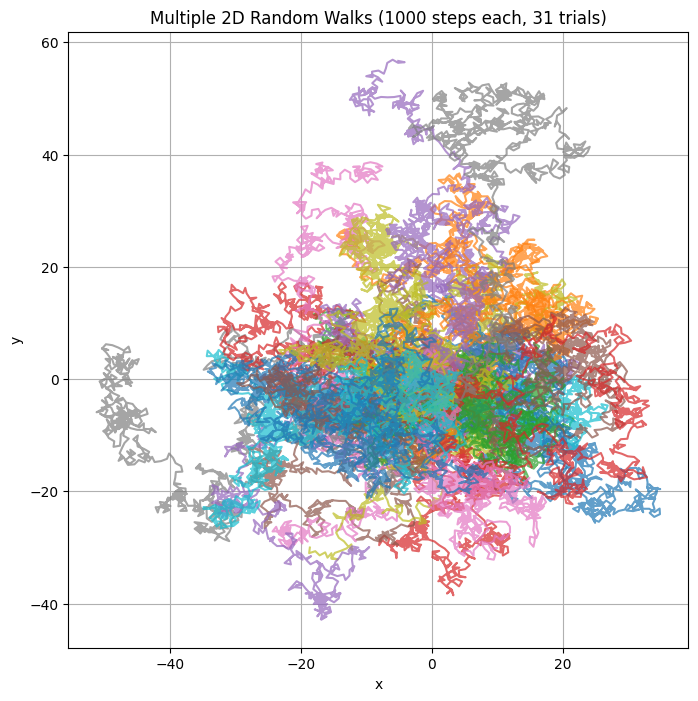

In [14]:
import random
import math
import matplotlib.pyplot as plt

num_steps = 1000  # Number of steps per walk
num_walks = int(math.sqrt(num_steps))  # Number of independent random walks

plt.figure(figsize=(8, 8))
mean_square_distances = [] #this is the new part, so we can store the calculated R^2s

for i in range(num_walks):
    random.seed(i)  # Ensure each walk has a different random seed
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() * 2) - 1  # -1 <= dx' <= 1
        dy_prime = (random.random() * 2) - 1  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk


    R_squared = x**2 + y**2  # Calculate R^2 for this trial
    mean_square_distances.append(R_squared) #add it to my array for later use

# Now that all steps were taken we can
# compute average mean square distance
average_R_squared = sum(mean_square_distances) / num_walks 
print(f"⟨R²(N)⟩ = {average_R_squared}") #and print

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


## 4.2.2 Random Walks in a Brain

1) Try to reproduce the simulation shown on the left of Figure 4.5 by recording and plotting 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, and restrict the simulation space to two dimensions.

2) As shown on the right of Figure 4.4, determine the average over all your walks of the RMS distance covered, $R_{\text{rms}}$.

3) Take the same 2D space covered in your simulations, and now insert circular obstructions of varied sizes, similar to those on the right of Figure 4.5.

4) Yet again, conduct and record 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, but include obstructions that stop the walks when they hit them.

5) Determine again the average over all your obstructed walks of the RMS distance covered, $ R_{\text{rms}} $. The obstructions should lead to a decreased $ R_{\text{rms}} $.

6) Again, conduct and record 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, but include obstructions that repel, but don’t stop, the walks when they hit.

7) Again, determine the average over all your obstructed walks of the RMS distance covered, $ R_{\text{rms}} $, and compare to the previous two results.

8) In Einstein’s 1905 paper *Investigations on the Theory of the Brownian Movement*, he proposed that the effective diffusion coefficient within a medium is $ D = \frac{R_{\text{rms}}^2}{2dt} $, where $ d $ is the number of spatial dimensions (2 for a 2D simulation), and $ t $ is the average time for a walk. How much of an effect do the obstructions cause on $ D $?

9) Repeat the problem for a three-dimensional volume.


## 4.3.4 Decay Implementation and Visualization

Write a program to simulate radioactive decay using the simple program in Listing 4.3 as a guide. You should obtain results similar to those in Figure 4.7.

1) Plot the logarithm of the number left, $\ln N(t)$, and the logarithm of the decay rate, $\ln \frac{\Delta N(t)}{\Delta t}$, versus time. Note that the simulation measures time in steps of $ \Delta t $ (generation number).

2) Check that you obtain what looks like exponential decay when you start with large values for $ N(0) $, but that the decay displays its stochastic nature for small $ N(0) $ (large $ N(0)$ values are also stochastic; they just don’t look it at first).

3) Create two plots, one showing that the slopes of $ N(t) $ versus time are independent of $ N(0) $, and another showing that the slopes are proportional to the value for $ \lambda $.

4) Create a plot showing that, within expected statistical variations, $ \ln N(t) $ and $ \ln \frac{\Delta N(t)}{\Delta t} $ are proportional.

5) Explain in your own words how a process that is spontaneous and random at its very heart can lead to exponential decay.

6) How does your simulation show that the decay is exponential-like and not a power law, such as $ N = \beta t^{-\alpha} $?
